In [1]:
from URSGeneClassifier import *
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics, model_selection, svm, linear_model
from sklearn.utils import shuffle
from random import randrange
import numpy as np
import pickle
import os
import pandas
import matplotlib.pyplot as plt
import scipy.sparse as sps

In [3]:
dict = re_id_genes_to_dict("alz/microglia/MIT.txt", "alz/microglia/MIT_restruc.txt", "alz/microglia/saved_dictionary.pkl")

In [4]:
sp_matrix, dim = create_sparse_matrix(dict, "alz/microglia/MIT_restruc.txt")

No. of distinct genes in network: 1530
Creating sparse matrix...
Created sparse matrix.


In [5]:
print(sp_matrix[:,1])
print(dict['2989'])

  (0, 0)	0.0003982945804063
  (2, 0)	0.0009619630666234
  (8, 0)	0.0004887925803754
  (22, 0)	0.0019113925708528
  (27, 0)	0.0001139350087265
  (40, 0)	0.0016217968551106
  (43, 0)	0.000338647344142
  (49, 0)	0.003481481494843
  (60, 0)	0.0058220697876055
  (63, 0)	0.0019445773666414
  (64, 0)	0.0009774230905018
  (70, 0)	0.002155354811768
  (72, 0)	0.0011046943201252
  (83, 0)	0.000525034371616
  (85, 0)	0.0018542155624062
  (89, 0)	0.0001256728246701
  (97, 0)	0.0007196501592445
  (101, 0)	0.0005809590746371
  (107, 0)	0.0017761225179137
  (113, 0)	0.0017341100725534
  (120, 0)	6.5324448613531e-05
  (125, 0)	0.0012626461594589
  (134, 0)	0.0057636031417937
  (143, 0)	0.0005117636851159
  (145, 0)	0.0001676563908358
  (148, 0)	0.0002487885120579
  (150, 0)	0.000688536015499
  (157, 0)	0.0025868777301554
  (160, 0)	0.000804083373466
  (161, 0)	0.0026764756885938
  (164, 0)	0.0033567599104923
  (165, 0)	0.0003254677395917
  (172, 0)	0.0051666073554711
  (174, 0)	0.0025362911185578
  (18

KeyError: '2989'

In [7]:
positiveClass, set_pos = create_positive_class('alz/alz.dis.txt', sp_matrix, dict, 'alz/microglia/saved_positive_class.pkl')

No. of Alz genes found in network: 81 out of 673


In [9]:
sp_matrix.shape


(1530, 1530)

In [10]:
print(positiveClass.shape)

(81, 1530)


In [11]:
negativeClass, set_neg = create_negative_class(set_pos, sp_matrix, dict)

In [12]:
print(len(set_neg))
print(len(set_pos))
print(negativeClass.shape)
print(positiveClass.shape)

79
81
(81, 1530)
(81, 1530)


In [15]:
fullTrain = create_full_training_class(positiveClass, negativeClass, "alz/microglia/saved_full_train.pkl")

In [16]:
print(fullTrain.shape)

(162, 1531)


In [17]:
X_train, X_test, y_train, y_test, X_full, y_full = load_and_format_training_data('alz/microglia/saved_full_train.pkl')


5 fold cross validation scores:
[0.48484848 0.48484848 0.53125    0.5        0.5       ]

5 fold cross validation score average:
0.500189393939394

AUROC score:
0.5


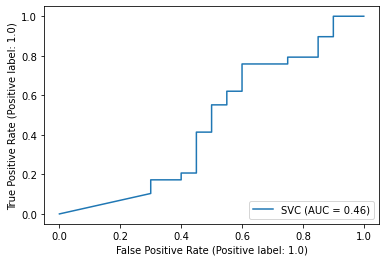

29 wrong out of 49
Accuracy: 0.40816326530612246


In [18]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
evaluate_model(svm_linear, X_full, y_full, X_test, y_test)


5 fold cross validation scores:
[0.54545455 0.63636364 0.625      0.59375    0.5625    ]

5 fold cross validation score average:
0.5926136363636363

AUROC score:
0.5586206896551724


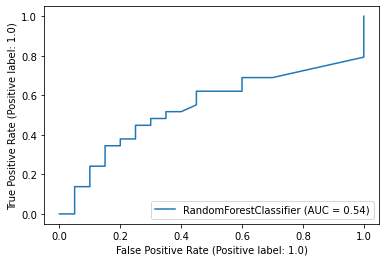

22 wrong out of 49
Accuracy: 0.5510204081632653


In [19]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
evaluate_model(rfc, X_full, y_full, X_test, y_test)